<a href="https://colab.research.google.com/github/BattalovTN/Battalov_statprak/blob/main/NewProjectREWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Body signal of smoking***
Авторы: Батталов Тамерлан 331

## **Введение**

***Постановка задачи***

Исследуется датасет Body signal of smoking (https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking/data), содержащий данные по курению. Основная цель — построить модель машинного обучения, которая классифицирует курящих и некурящих.

### ***Датасет включает следующие ключевые поля:***

* ID : index
* gender
* age : 5-years gap
* height(cm)
* weight(kg)
* waist(cm) : Waist circumference length
* eyesight(left)
* eyesight(right)
* hearing(left)
* hearing(right)
* systolic : Blood pressure
* relaxation : Blood pressure
* fasting blood sugar
* Cholesterol : total
* triglyceride (тип жиров (липидов), которые являются основным источником энергии для организма и хранятся в жировой ткани)
* HDL : cholesterol type (хороший холестерин)
* LDL : cholesterol type (плохой холестерин)
* hemoglobin (гемоглобин)
* Urine protein (белок в моче)
* serum creatinine (продукт распада креатина и фосфата)
* AST : glutamic oxaloacetic transaminase type (фермент, присутствующий внутри клеток организма, который участвует в метаболизме аминокислот)
* ALT : glutamic oxaloacetic transaminase type (фермент, который в норме имеет низкую активность сыворотке в крови, так как сосредоточен внутри клеток)
* Gtp : γ-GTP (фермент, который часто определяется при анализе крови для оценки функции печени и выявления патологий)
* oral : Oral Examination status
* dental caries
* tartar : tartar status (зубной камень)
* smoking




### ***Цели исследования***

**1. Разведочный анализ данных (EDA):**

* Выявить ключевые признаки, коррелирующие с целевой переменной.
* Обработать пропуски, закодировать некоторые категориальные переменные
* Исследовать распределения и зависимости между признаками.

**2. Работа с признаками**

**3. Построение моделей:**

* Random Forest
* Логистическая регрессия
* XGBoost

**4. Сравнение моделей и вывод**



# Разведочный анализ данных (EDA)
### Подключение библиотек

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import gc

pd.set_option('future.no_silent_downcasting', True)
np.random.seed(42)

%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    "figure.dpi": 300,
})

from tqdm.auto import tqdm


### Загрузка данных, обзор.

In [24]:
# Загрузка данных
df = pd.read_csv('smoking.csv')

# Очистка памяти после загрузки
gc.collect()

# Вывод размера датасета
df.shape

(55692, 27)

In [25]:
# Обзор
display(df.sample(7, random_state=42))
df.info(verbose=True, show_counts=True)

ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
33967  42427      F   45         160          55       71.0             1.0   
21956  27412      F   55         145          40       80.4             0.8   
15458  19283      M   25         170          80       94.0             1.0   
36215  45261      M   45         170          70       82.0             0.5   
8886   11155      M   40         165          60       77.0             1.2   
49225  23515      F   50         155          55       77.8             0.9   
50609  30394      M   45         170          65       87.0             1.2   

       eyesight(right)  hearing(left)  hearing(right)  ...  hemoglobin  \
33967              0.5            1.0             1.0  ...        11.3   
21956              0.5            1.0             1.0  ...        14.0   
15458              1.2            1.0             1.0  ...        16.6   
36215              0.4            1.0             1.0  ...        14.9   
8886               1.2            1.0             1.0  ...        16.4   
49225              1.5            1.0             1.0  ...        13.1   
50609              1.5            1.0             1.0  ...        15.9   

       Urine protein  serum creatinine   AST    ALT    Gtp  oral  \
33967            1.0               0.8  17.0   10.0   11.0     Y   
21956            1.0               0.7  24.0   14.0   19.0     Y   
15458            1.0               0.8  82.0  146.0  248.0     Y   
36215            1.0               0.6  27.0   45.0   70.0     Y   
8886             1.0               1.0  40.0   69.0   55.0     Y   
49225            1.0               0.7  23.0   22.0   12.0     Y   
50609            1.0               0.7  29.0   20.0   22.0     Y   

       dental caries  tartar  smoking  
33967              0       Y        0  
21956              1       N        1  
15458              1       N        0  
36215              0       N        0  
8886               0       N        0  
49225              0       Y        0  
50609              0       Y        1  

[7 rows x 27 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [26]:
df.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

### Удаление избыточных данных

In [27]:
df.drop(columns=['oral', 'ID', ], inplace=True)

In [28]:
df.columns

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar',
       'smoking'],
      dtype='object')

### Проверка отсутствующих/нулевых значений

In [29]:
df.isnull().sum().sort_values(ascending=False)

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64

### Некоторые графики

In [45]:
plt = px.pie(df, names = 'smoking', title = 'Соотношение курящих')
plt.show()

In [46]:
plt = px.histogram(df, x = 'gender', color = 'smoking', title = 'Статистика курщих по полу')
plt.show()

In [47]:
plt = px.histogram(df, x = 'age', color = 'smoking', title = 'Статистика курящих по возрасту')
plt.show()

In [48]:
plt = px.histogram(df, x = 'height(cm)', color = 'smoking', title = 'Статистика курящих по росту')
plt.show()

In [49]:
plt = px.histogram(df, x = 'weight(kg)', color = 'smoking', title = 'Статистика курящих по весу')
plt.show()

In [50]:
plt = px.histogram(df, x = 'dental caries', color = 'smoking', title = 'Статистика курящих по кариесу')
plt.show()

In [51]:
plt = px.histogram(df, x = 'tartar', color = 'smoking', title = 'Статистика курящих по зубному камню')
plt.show()

# Работа с признаками, перевод категориальных (некоторые уже переведены), просмотр корреляций

In [37]:
#Мужчина: 1
#Женщина: 0
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'M' else 0)
#Зубной камень Y->1, N->0
df['tartar'] = df['tartar'].apply(lambda x: 1 if x == 'Y' else 0)

In [38]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  int64  
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [39]:
numeric_cols = df.select_dtypes(include=["int", "float"]).columns.tolist()

In [40]:
df[numeric_cols].describe().T

count        mean        std    min    25%    50%  \
gender               55692.0    0.635657   0.481250    0.0    0.0    1.0   
age                  55692.0   44.182917  12.071418   20.0   40.0   40.0   
height(cm)           55692.0  164.649321   9.194597  130.0  160.0  165.0   
weight(kg)           55692.0   65.864936  12.820306   30.0   55.0   65.0   
waist(cm)            55692.0   82.046418   9.274223   51.0   76.0   82.0   
eyesight(left)       55692.0    1.012623   0.486873    0.1    0.8    1.0   
eyesight(right)      55692.0    1.007443   0.485964    0.1    0.8    1.0   
hearing(left)        55692.0    1.025587   0.157902    1.0    1.0    1.0   
hearing(right)       55692.0    1.026144   0.159564    1.0    1.0    1.0   
systolic             55692.0  121.494218  13.675989   71.0  112.0  120.0   
relaxation           55692.0   76.004830   9.679278   40.0   70.0   76.0   
fasting blood sugar  55692.0   99.312325  20.795591   46.0   89.0   96.0   
Cholesterol          55692.0  196.901422  36.297940   55.0  172.0  195.0   
triglyceride         55692.0  126.665697  71.639817    8.0   74.0  108.0   
HDL                  55692.0   57.290347  14.738963    4.0   47.0   55.0   
LDL                  55692.0  114.964501  40.926476    1.0   92.0  113.0   
hemoglobin           55692.0   14.622592   1.564498    4.9   13.6   14.8   
Urine protein        55692.0    1.087212   0.404882    1.0    1.0    1.0   
serum creatinine     55692.0    0.885738   0.221524    0.1    0.8    0.9   
AST                  55692.0   26.182935  19.355460    6.0   19.0   23.0   
ALT                  55692.0   27.036037  30.947853    1.0   15.0   21.0   
Gtp                  55692.0   39.952201  50.290539    1.0   17.0   25.0   
dental caries        55692.0    0.213334   0.409665    0.0    0.0    0.0   
tartar               55692.0    0.555556   0.496908    0.0    0.0    1.0   
smoking              55692.0    0.367288   0.482070    0.0    0.0    0.0   

                       75%     max  
gender                 1.0     1.0  
age                   55.0    85.0  
height(cm)           170.0   190.0  
weight(kg)            75.0   135.0  
waist(cm)             88.0   129.0  
eyesight(left)         1.2     9.9  
eyesight(right)        1.2     9.9  
hearing(left)          1.0     2.0  
hearing(right)         1.0     2.0  
systolic             130.0   240.0  
relaxation            82.0   146.0  
fasting blood sugar  104.0   505.0  
Cholesterol          220.0   445.0  
triglyceride         160.0   999.0  
HDL                   66.0   618.0  
LDL                  136.0  1860.0  
hemoglobin            15.8    21.1  
Urine protein          1.0     6.0  
serum creatinine       1.0    11.6  
AST                   28.0  1311.0  
ALT                   31.0  2914.0  
Gtp                   43.0   999.0  
dental caries          0.0     1.0  
tartar                 1.0     1.0  
smoking                1.0     1.0

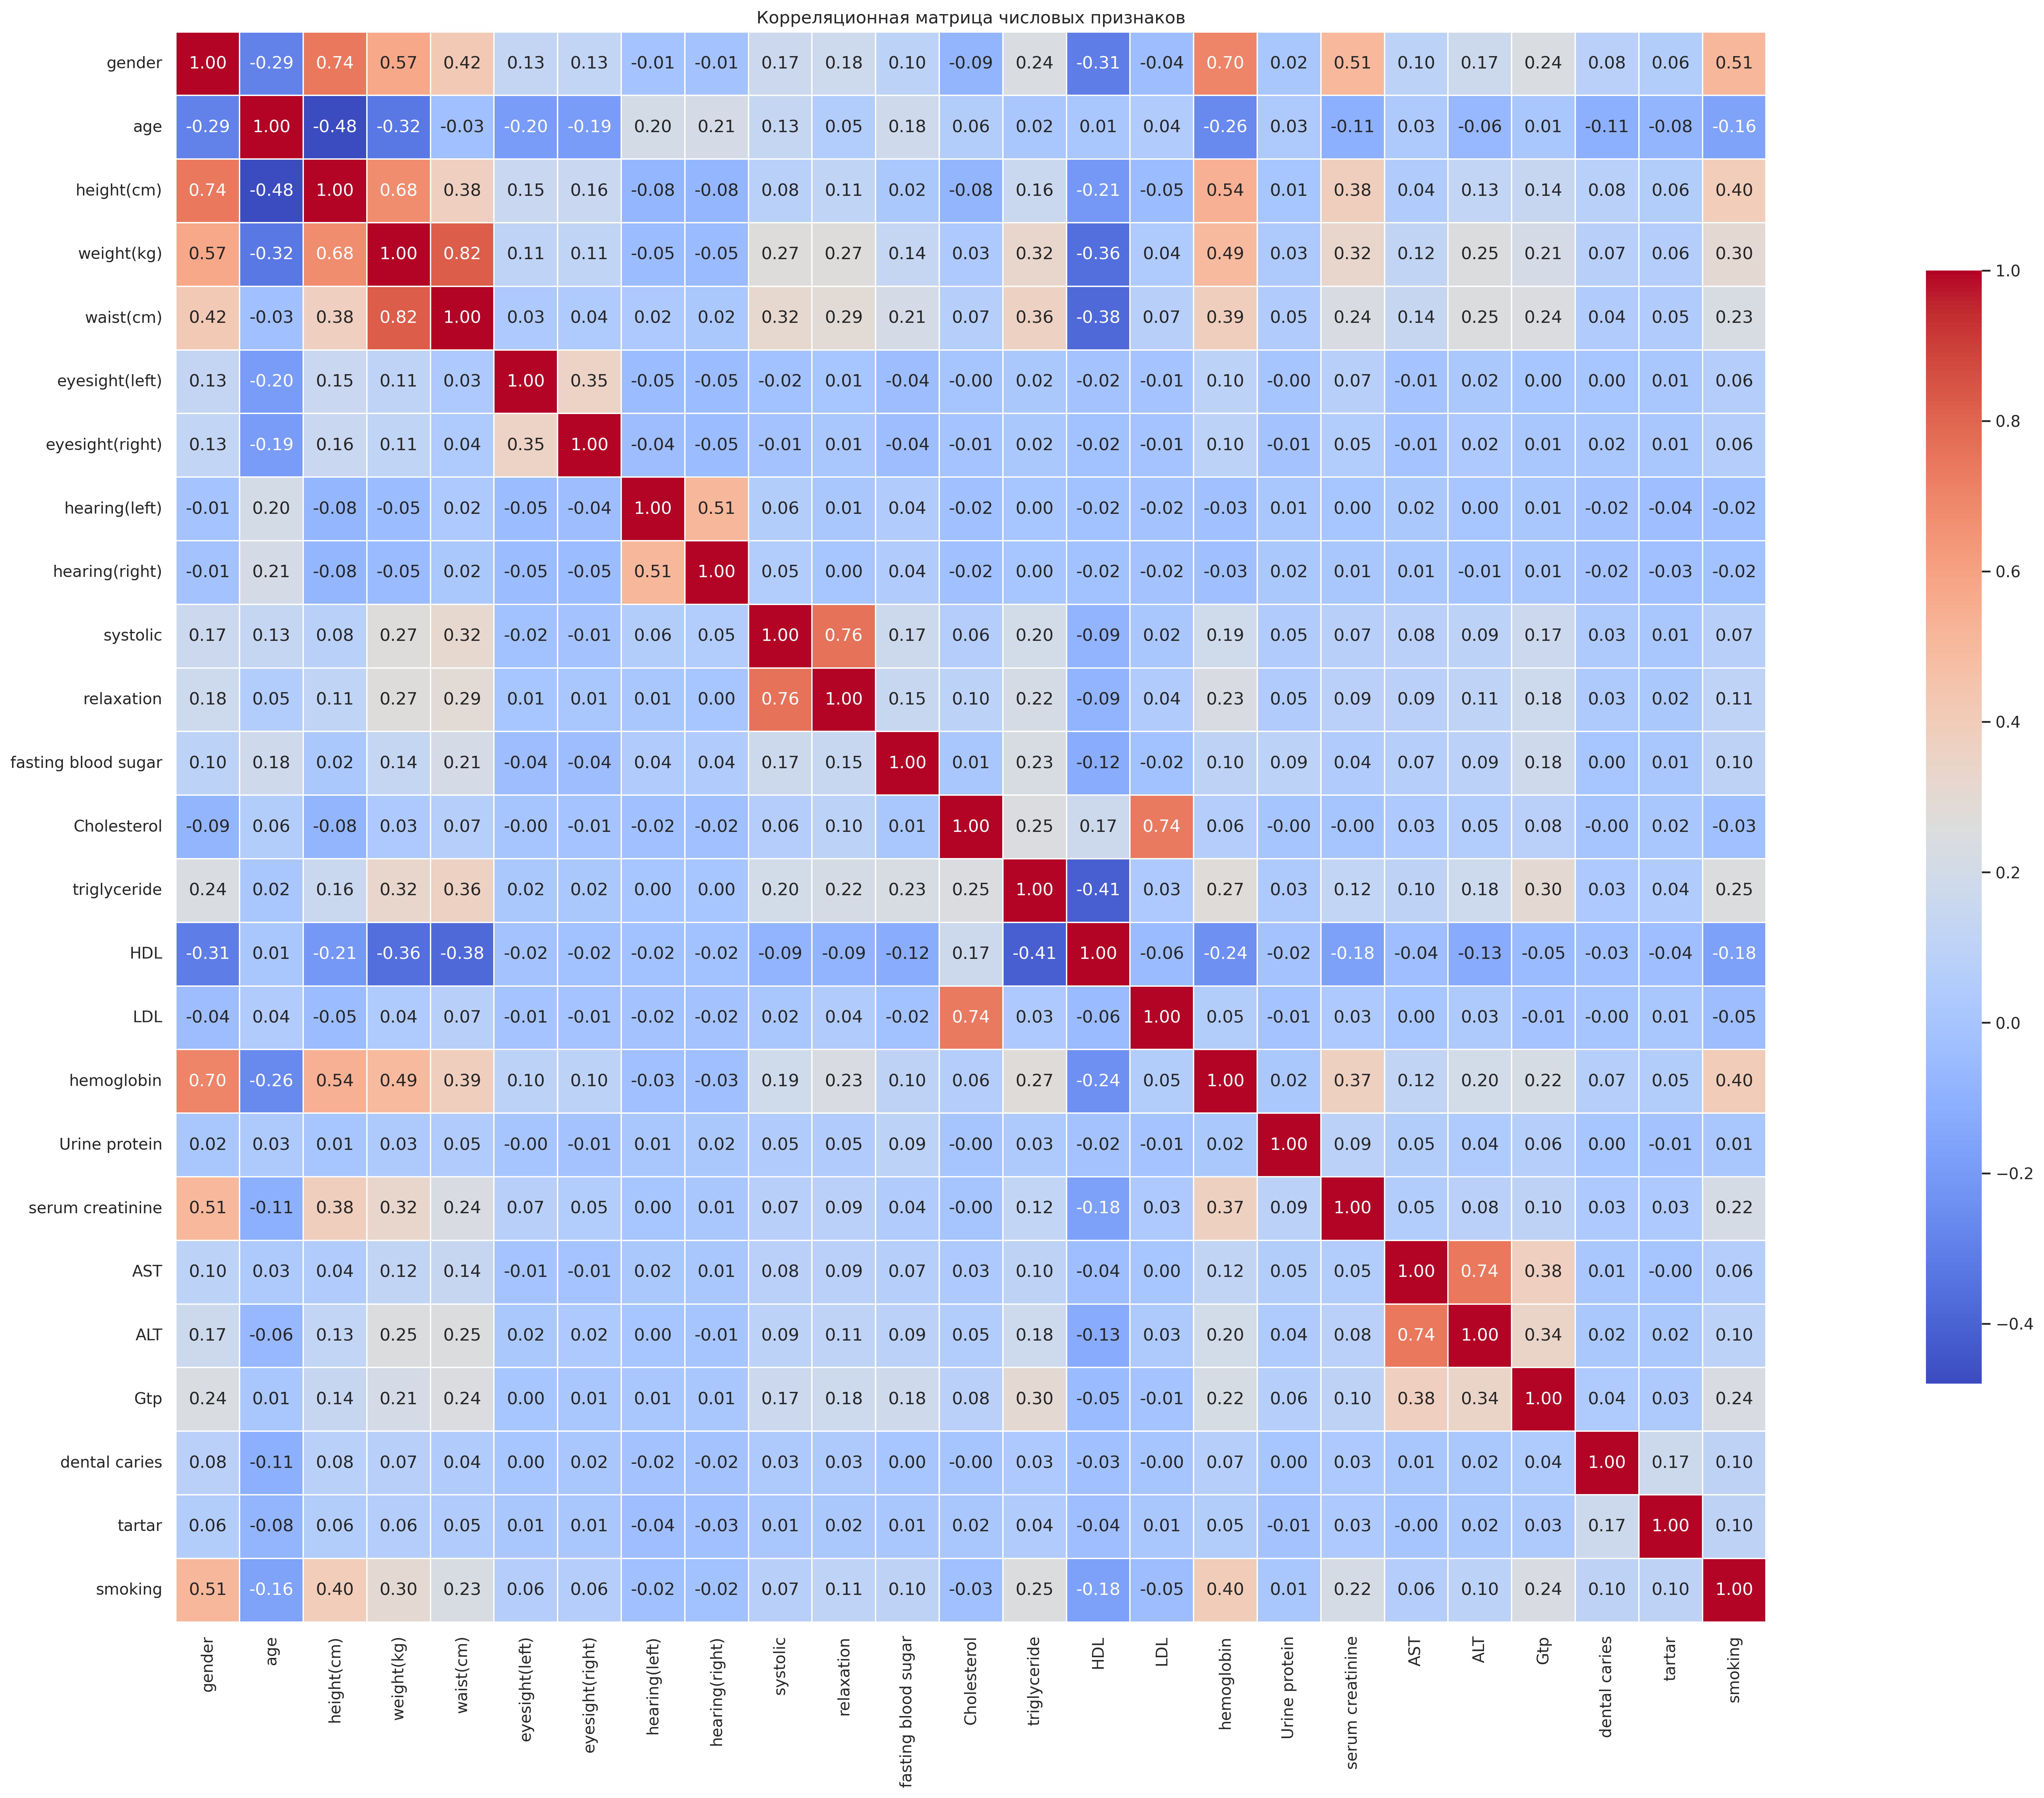

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df[numeric_cols].corr(method="pearson")

sns.set_theme(style="whitegrid", context="notebook")

plt.figure(figsize=(40, 20))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=.5,
    cbar_kws={"shrink": .7},
    square=True
)

plt.title("Корреляционная матрица числовых признаков")
plt.show()

#Модели

### Random Forest

Аккуратность: 0.8349043899811474

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      7027
           1       0.76      0.80      0.78      4112

    accuracy                           0.83     11139
   macro avg       0.82      0.83      0.82     11139
weighted avg       0.84      0.83      0.84     11139



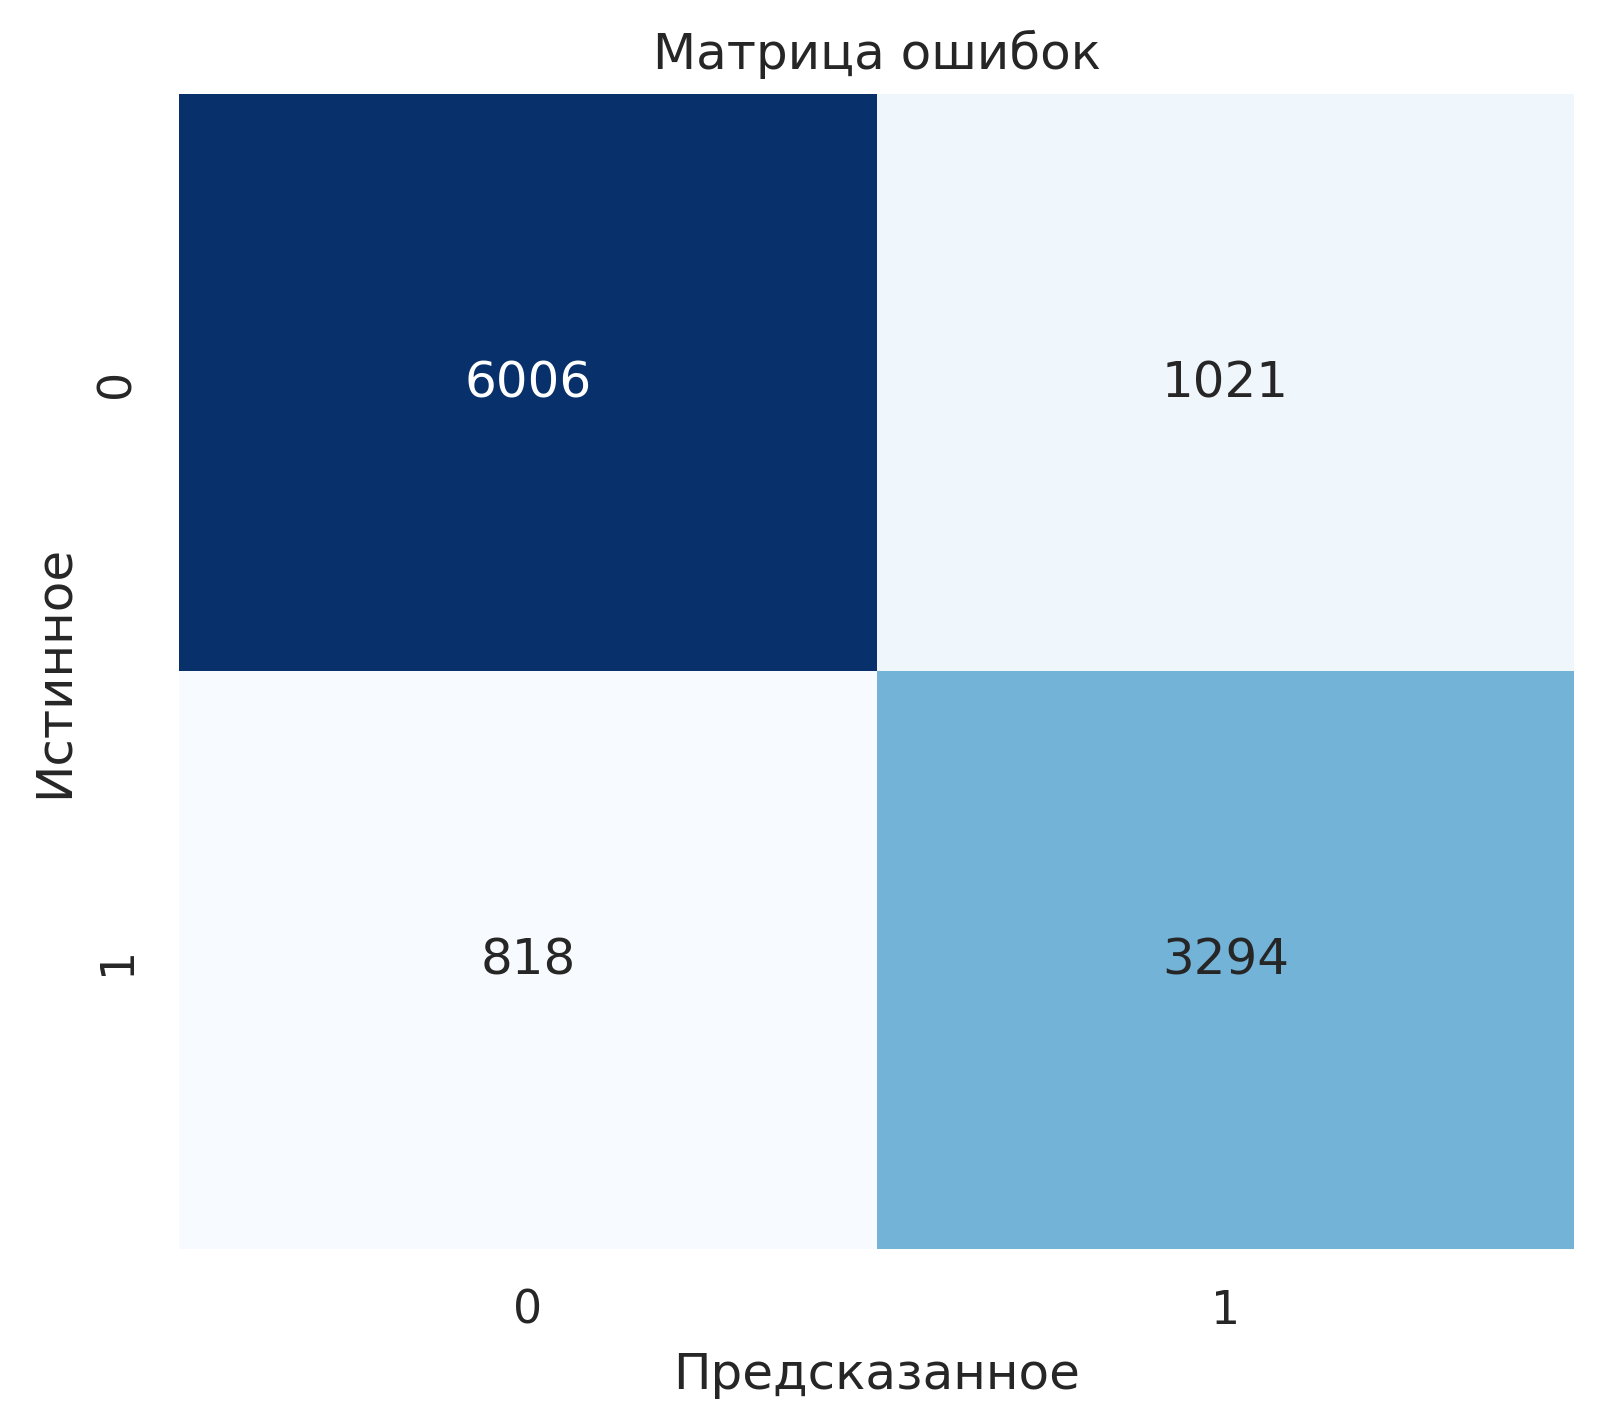

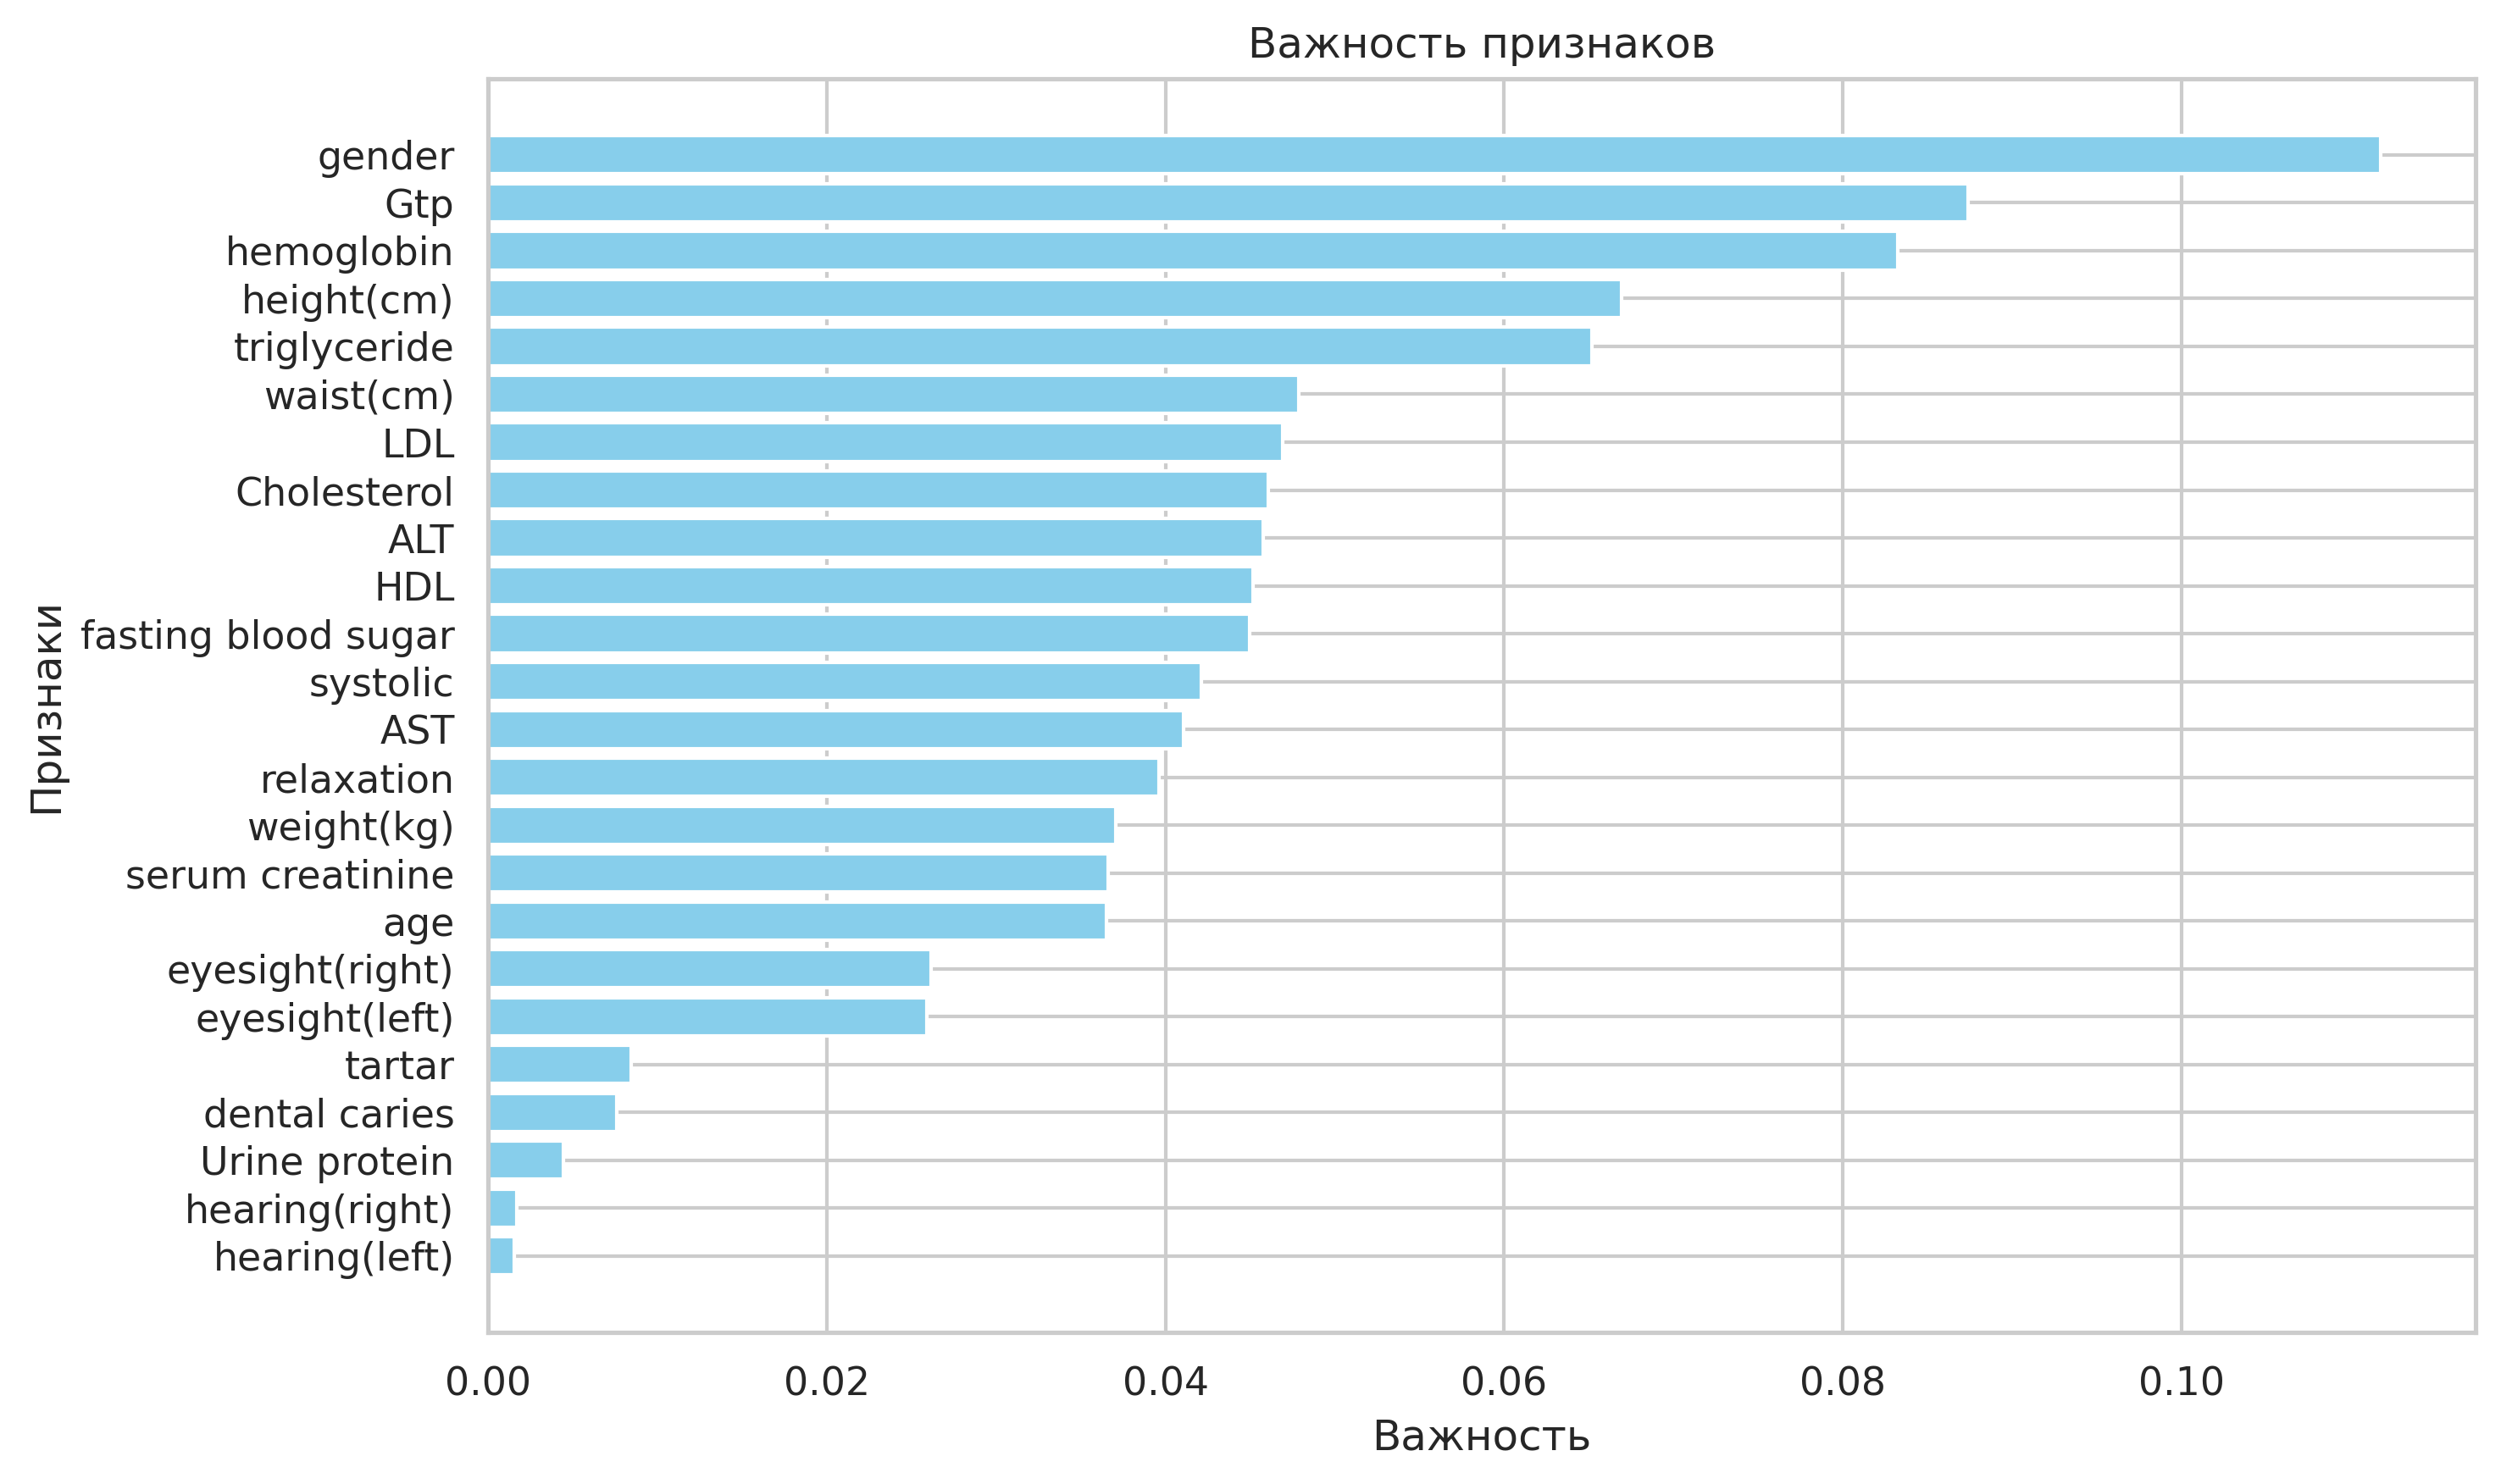

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Разделение на признаки и целевую переменную
X = df.drop('smoking', axis=1)
y = df['smoking']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаём и обучаем модель RandomForest
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Предсказания на тесте
y_pred = rfc.predict(X_test)

# Метрики
acc = accuracy_score(y_test, y_pred)
print("Аккуратность:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=rfc.classes_, yticklabels=rfc.classes_)
plt.xlabel('Предсказанное')
plt.ylabel('Истинное')
plt.title('Матрица ошибок')
plt.show()

# Важность признаков
importances = rfc.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feat_df['Feature'], feat_df['Importance'], color='skyblue')
plt.xlabel('Важность')
plt.ylabel('Признаки')
plt.title('Важность признаков')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Логистическая регрессия

Accuracy: 0.7408205404434869
Best Parameters: {'C': 100, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      7027
           1       0.64      0.69      0.66      4112

    accuracy                           0.74     11139
   macro avg       0.72      0.73      0.73     11139
weighted avg       0.75      0.74      0.74     11139



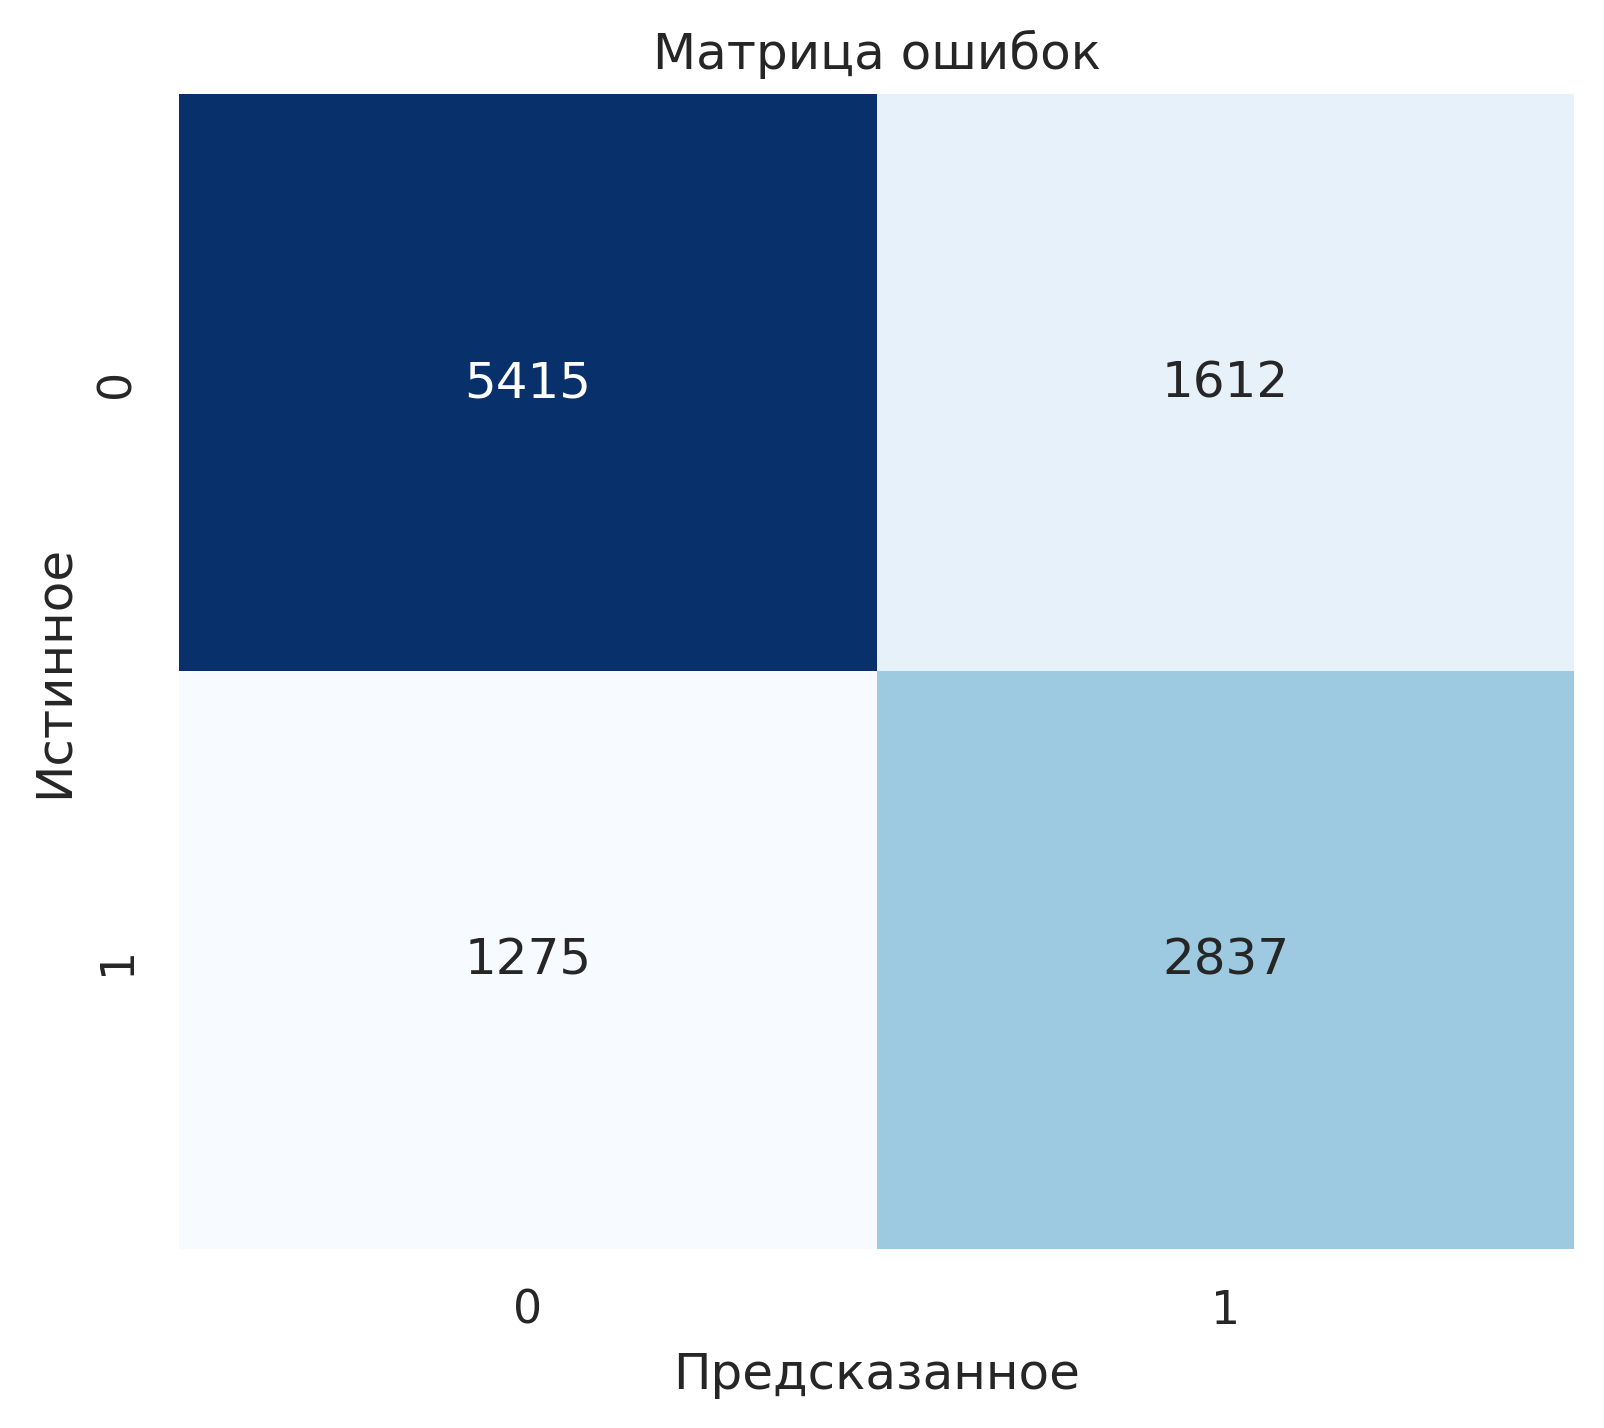

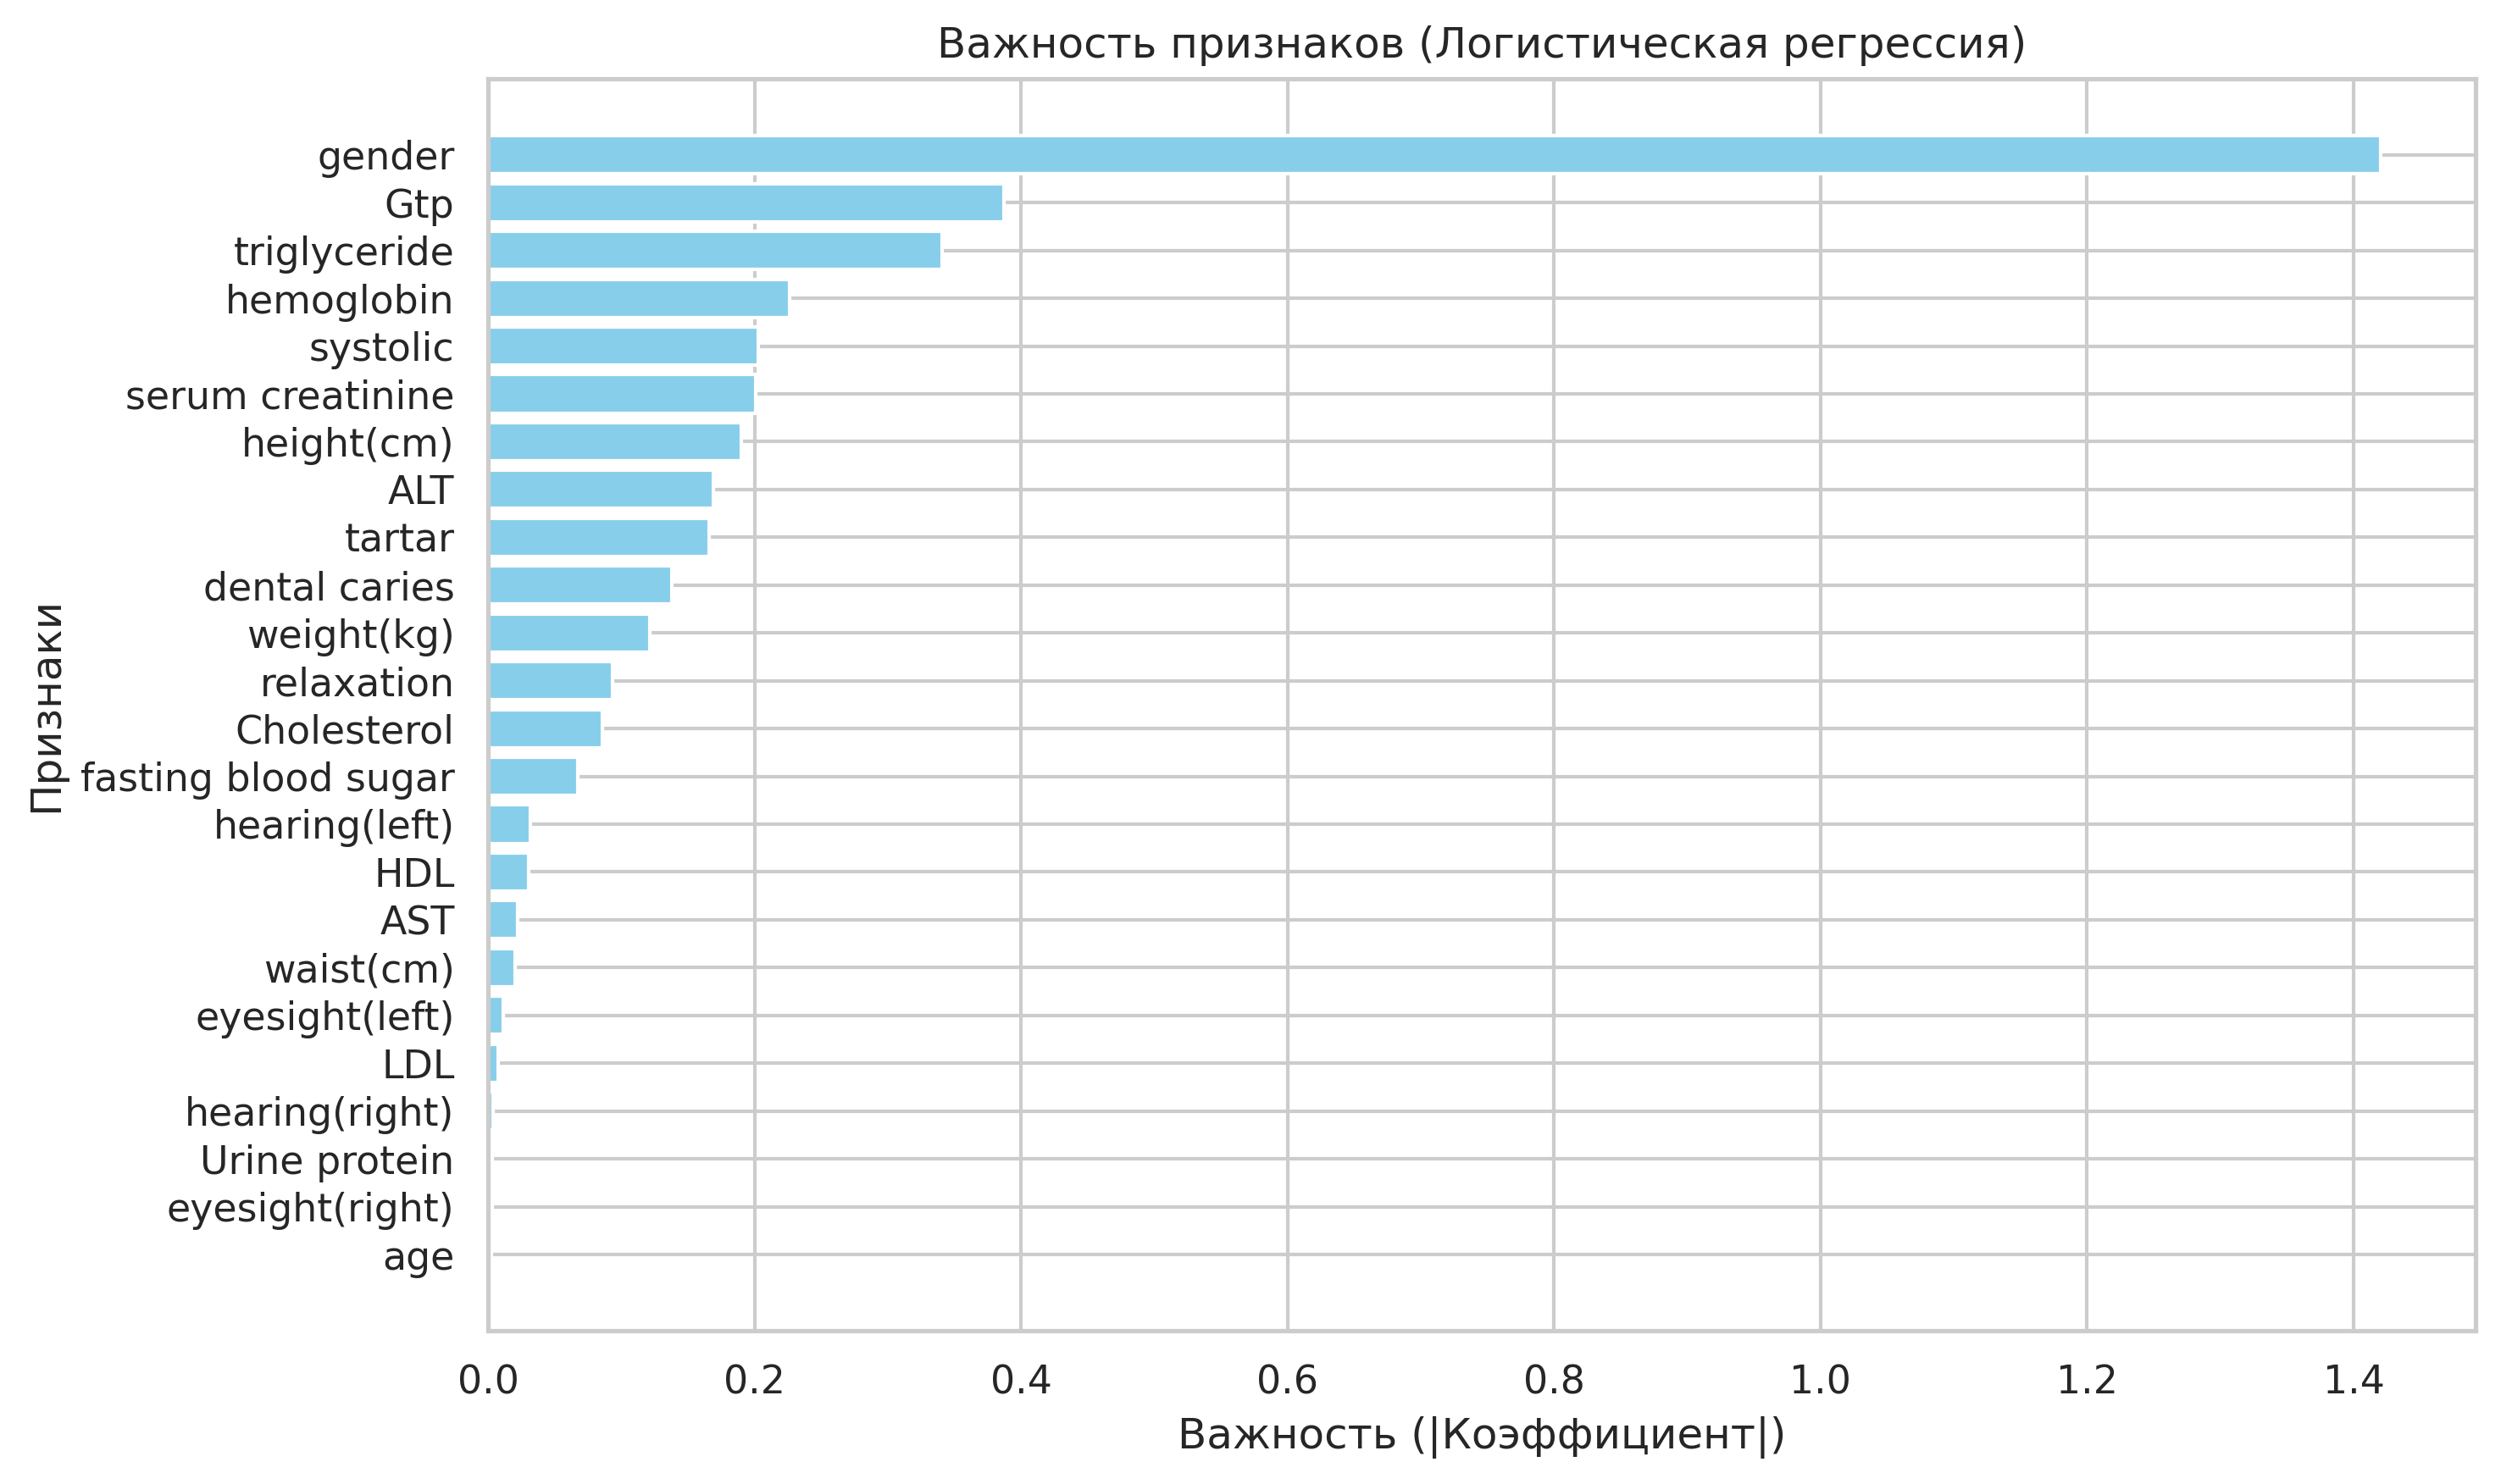

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Разделение на признаки и целевую переменную
X = df.drop('smoking', axis=1)
y = df['smoking']

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Подбор гиперпараметров с помощью GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # 'l1' можно использовать с solver='liblinear' или 'saga'
    'solver': ['lbfgs']  # стабильный solver для l2
}

log_reg = LogisticRegression(max_iter=1000, random_state=42)

grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Лучшая модель
logreg_best = grid.best_estimator_

# Предсказания
y_pred = logreg_best.predict(X_test)

# Общая точность
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Параметры модели
print("Best Parameters:", logreg_best.get_params())

# Классификационный отчёт
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=logreg_best.classes_, yticklabels=logreg_best.classes_)
plt.xlabel('Предсказанное')
plt.ylabel('Истинное')
plt.title('Матрица ошибок')
plt.show()

# Важность признаков (по абсолютному значению коэффициентов)
importances = abs(logreg_best.coef_[0])
features = X.columns  # или selected_features, если использовался отбор признаков
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feat_df['Feature'], feat_df['Importance'], color='skyblue')
plt.xlabel('Важность (|Коэффициент|)')
plt.ylabel('Признаки')
plt.title('Важность признаков (Логистическая регрессия)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### XGBoost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[10:19:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Аккуратность 0.8067151449860849
Лучшие параметры {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}

Отчёт
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      7027
           1       0.73      0.75      0.74      4112

    accuracy                           0.81     11139
   macro avg       0.79      0.79      0.79     11139
weighted avg       0.81      0.81      0.81     11139



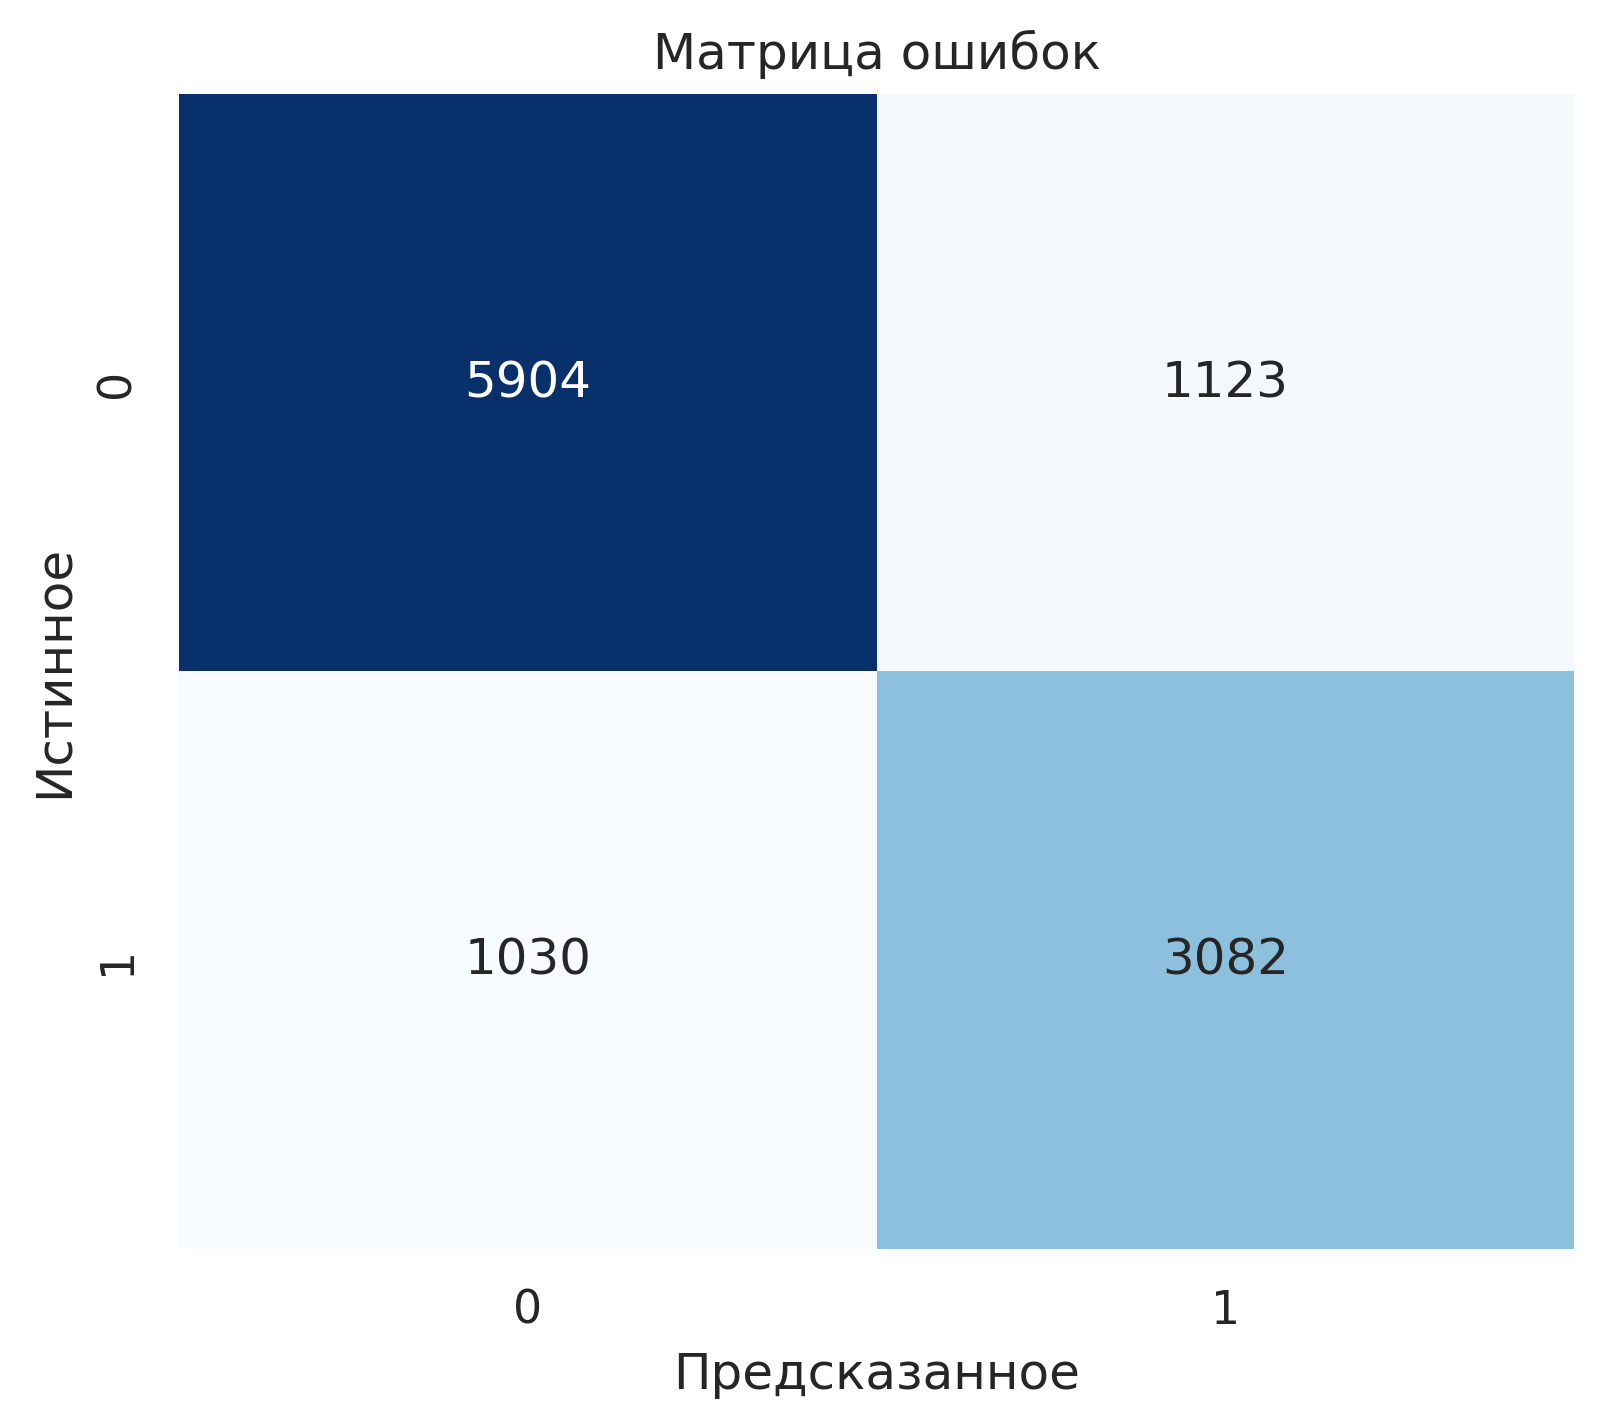

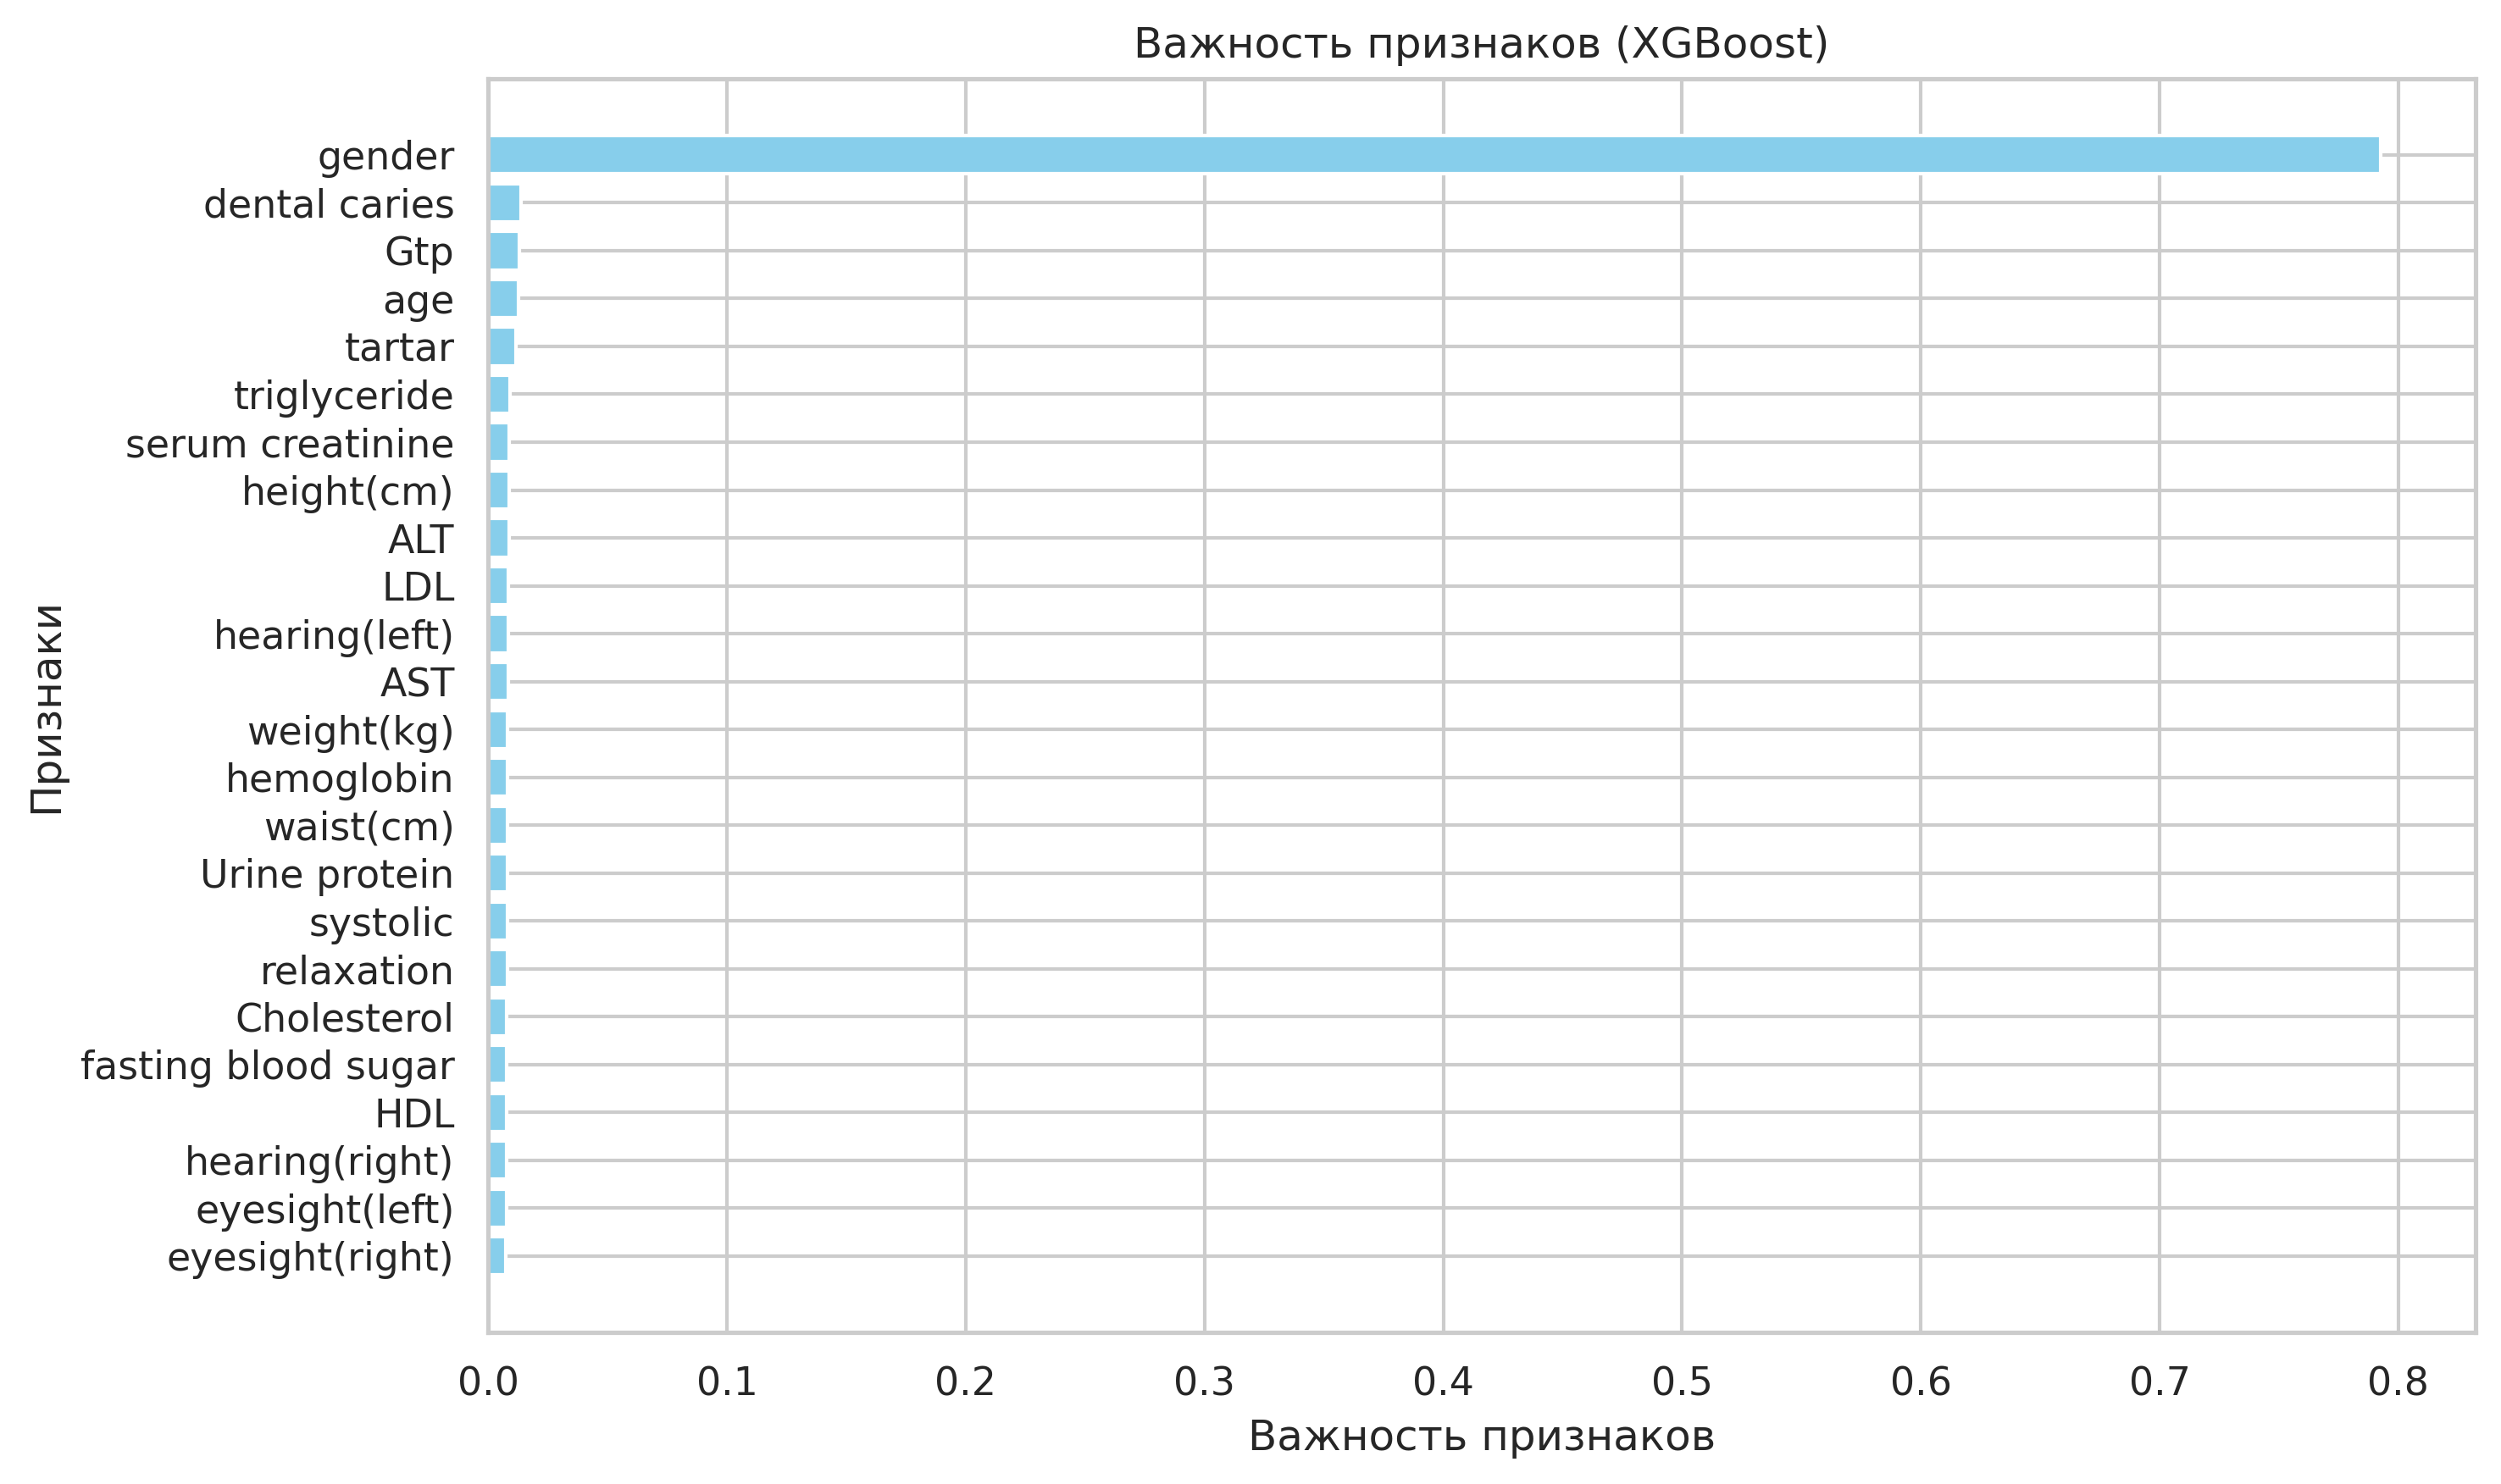

In [44]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Разделение на признаки и целевую переменную
X = df.drop('smoking', axis=1)
y = df['smoking']

# Разделение на обучающую и тестовую выборки (без стандартизации)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Подбор гиперпараметров с помощью GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Лучшая модель
xgb_best = grid.best_estimator_

# Предсказания
y_pred = xgb_best.predict(X_test)

# Общая точность
acc = accuracy_score(y_test, y_pred)
print("Аккуратность", acc)

# Параметры модели
print("Лучшие параметры", grid.best_params_)

# Классификационный отчёт
print("\nОтчёт\n", classification_report(y_test, y_pred))

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Предсказанное')
plt.ylabel('Истинное')
plt.title('Матрица ошибок')
plt.show()

# Важность признаков
importances = xgb_best.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feat_df['Feature'], feat_df['Importance'], color='skyblue')
plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Важность признаков (XGBoost)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#Вывод

Были проведены EDA и ML(Random Forest, логистическая регрессия, XGBoost)

Точности моделей соответственно: 0.83, 0.74 и 0.81

Как можем заметить, наиболее успешной оказалась модель случайного леса. Также стоит сказать, что наиболее значимыми признаками в обучении всех моделей оказались gender, Gtp, triglyceride, hemoglobine (пояснения по признакам в начале)